# Cell Type Annotation

In [21]:
import scanpy as sc
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = (12, 12)

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


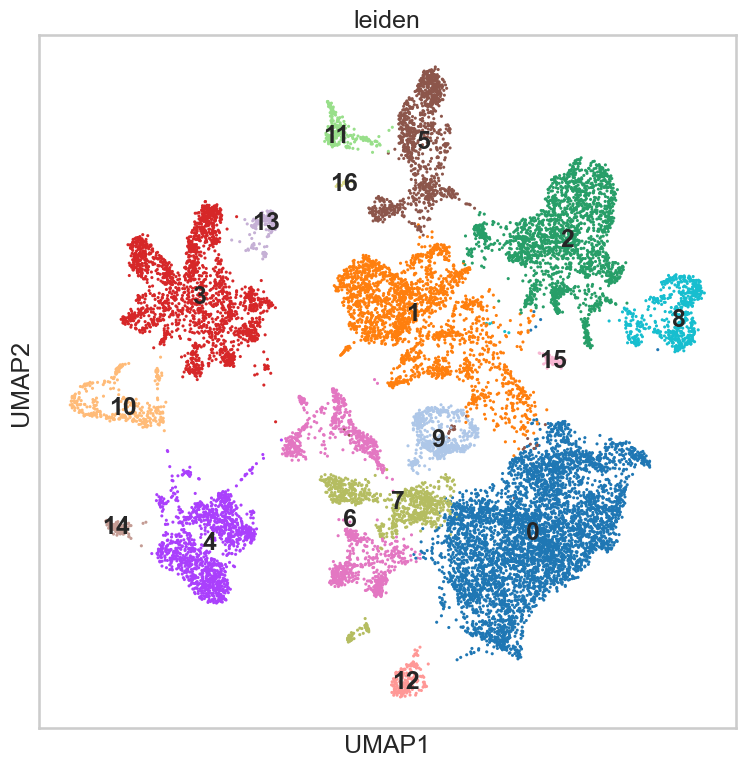

In [12]:
# load data
adata = sc.read("data/adata_processed_2_lea.h5ad")
sc.tl.leiden(adata, resolution=0.2)
sc.pl.umap(adata, color='leiden', size=20, legend_loc='on data')

In [ ]:
# cell type specific genes
marker_genes = {
    "Neutrophil": ["S100a8", "S100a9"],
    "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],  # Vegfa added from Helperclass
    "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],  # Lcn2 added from Helperclass
    "Transitioning epi": ["Krt8", "Krt18"],
    "Club": ["Scgb1a1", "Scgb3a2"],
    "Goblet": ["Muc5ac", "Muc5b"],
    "Ciliated": ["Foxj1", "Pifo"],
    "T-Cells": ["Cd3e", "Cd4", "Cd8a", "Cd3d"],  # Cd3d added from Helperclass
    "NK-Cells": ["Tyrobp", "Gzma", "Nkg7"],
    "B-Cells": ["Cd79a", "Cd19", "Ms4a1"],
    "Monocytes": ["Cd14", "Vcan", "FCGR3A (CD16)", "Fcgr4"],
    "Plasmacytoid dendridic": ["Siglech", "Clec4c"],
    "Interstitial macrophages": ["Trem2", "C1qa"],
    "Alveolar macrophage": ["Marco", "Chil3", "Fabp4"],
    "Classical Monocyte": ["F13a1", "Ly6c2"],
    "Nonclassical monocyte": ["Treml4", "Fcgr3"],
    "Dendridic": ["Clec9a", "H2-Aa"],
    "Ccr7 dendridic": ["Ccr7"],
    "Basophil": ["Cpa3"],
    "SMCs": ["Acta2", "Tagln"],
    "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
    # Col3a1, Postn, Tnc, S100a6, Ccl2 added from Helperclass
    "Fibroblasts": ["Col1a2"],
    "Mesothelial": ["Msln", "Upk3b"],
    "Pericytes": ["Vtn", "Mcam"],
    "Peribronchiolar fibroblasts": ["Hhip", "Aspn"],
    "Alveolar fibroblasts": ["Npnt"],
    "Adventitial fibroblasts": ["Dcn", "Pi16"],
    "Endothelial": ["Pecam1", "Ly6c1"],
    "Aerocyte": ["Car4", "Ednrb"],
    "Vein endo": ["Slc6a2", "Vegfc"],
    "Lymphatic endothelial": ["Pdpn"]
}

In [28]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [ ]:
# not uploaded executed because there are too many plots
for ct in marker_genes_in_data.keys():
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",
        sort_order=False,
        frameon=False,
        cmap="Reds",
    )
    plt.savefig(os.path.join("/Users/leahollenberg/Desktop/Masterpraktikum/Peyser/UMAP", f"{ct}_umap.png"))
    plt.close()
    print("\n\n\n")

In [6]:
# Berechnen der Marker-Gene für jeden Cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# Zugriff auf die Marker-Gene und deren spezifische Metriken
marker_genes = adata.uns['rank_genes_groups']['names']
marker_gene_scores = adata.uns['rank_genes_groups']['scores']

In [10]:
# empty Dictionaries
marker_genes_dict = {}

# store top 10 Marker-Genes for each Cluster
for cluster_id in range(17):  # Cluster 0 bis 16
    cluster_marker_genes = marker_genes[str(cluster_id)][:10]  # top 10 Marker-Genes
    marker_genes_dict[cluster_id] = cluster_marker_genes

# Ausgabe des Dictionaries
for cluster_id, genes in marker_genes_dict.items():
    print(f"Cluster {cluster_id}: {genes}")

Cluster 0: ['Ftl1' 'Ctss' 'Psap' 'Ctsb' 'Fth1' 'Ctsd' 'Ccl6' 'Lyz2' 'Hexa' 'Lyz1']
Cluster 1: ['Egfl7' 'Epas1' 'Ramp2' 'Cldn5' 'Tspan7' 'Cdh5' 'Ly6c1' 'Tmem100'
 'Calcrl' 'Ly6a']
Cluster 2: ['Bgn' 'Mgp' 'Serping1' 'Sod3' 'Fxyd1' 'Gsn' 'Gpx3' 'Col1a2' 'Fhl1'
 'Sparc']
Cluster 3: ['Rac2' 'Rps15a' 'Rpl13a' 'Shisa5' 'Ptprcap' 'Cd3g' 'Rpl19' 'Cd3d' 'Uba52'
 'Rps3']
Cluster 4: ['Cd79a' 'Cd79b' 'Ighm' 'Ly6d' 'Igkc' 'Iglc2' 'Iglc3' 'Cd37' 'Ms4a1'
 'Rpl18a']
Cluster 5: ['Ager' 'Cldn18' 'Wfdc2' 'Chchd10' 'Spint2' 'Vamp8' 'Alcam' 'Atp1b1'
 'Ptprf' 'Aqp5']
Cluster 6: ['Ifitm6' 'Alox5ap' 'Plac8' 'Fcer1g' 'Msrb1' 'Ms4a6c' 'Tyrobp' 'H3f3a'
 'Ifitm2' 'Hp']
Cluster 7: ['Syngr2' 'Lsp1' 'Cd74' 'H2-Aa' 'H2-Eb1' 'S100a4' 'Cst3' 'Atox1' 'Tmsb4x'
 'H2-Ab1']
Cluster 8: ['C3' 'Nkain4' 'Dcn' 'Aebp1' 'Rarres2' 'Igfbp6' 'Clu' 'Gpm6a' 'Efemp1'
 'C1s1']
Cluster 9: ['Cst3' 'Plbd1' 'Irf8' 'Naaa' 'H2-Ab1' 'Ckb' 'H2-DMb1' 'Gng10' 'H2-Aa'
 'H2-DMa']
Cluster 10: ['Dntt' 'Hmgb1' 'Lck' 'Ptma' 'Thy1' 'Stmn1' 'Lat' 'Satb1' '

Cluster 0: Alveolar Macrophages
- Marker Genes: Ftl1, Ctss, Psap, Ctsb, Fth1, Ctsd, Ccl6, Lyz2, Hexa, Lyz1

Cluster 1: Endothelial Cells
- Marker Genes: Egfl7, Epas1, Ramp2, Cldn5, Tspan7, Cdh5, Ly6c1, Tmem100, Calcrl, Ly6a

Cluster 2: Fibroblasts
- Marker Genes: Bgn, Mgp, Serping1, Sod3, Fxyd1, Gsn, Gpx3, Col1a2, Fhl1, Sparc

Cluster 3: T Cells
- Marker Genes: Rac2, Rps15a, Rpl13a, Shisa5, Ptprcap, Cd3g, Rpl19, Cd3d, Uba52, Rps3

Cluster 4: B Cells
- Marker Genes: Cd79a, Cd79b, Ighm, Ly6d, Igkc, Iglc2, Iglc3, Cd37, Ms4a1, Rpl18a

Cluster 5: Alveolar Epithelial Cells
- Marker Genes: Ager, Cldn18, Wfdc2, Chchd10, Spint2, Vamp8, Alcam, Atp1b1, Ptprf, Aqp5

Cluster 6: Monocytes/Macrophages
- Marker Genes: Ifitm6, Alox5ap, Plac8, Fcer1g, Msrb1, Ms4a6c, Tyrobp, H3f3a, Ifitm2, Hp

Cluster 7: Monocytes/Macrophages
- Marker Genes: Syngr2, Lsp1, Cd74, H2-Aa, H2-Eb1, S100a4, Cst3, Atox1, Tmsb4x, H2-Ab1

Cluster 8: Mesenchymal Stromal Cells
- Marker Genes: C3, Nkain4, Dcn, Aebp1, Rarres2, Igfbp6, Clu, Gpm6a, Efemp1, C1s1

Cluster 9: Monocytes/Macrophages
- Marker Genes: Cst3, Plbd1, Irf8, Naaa, H2-Ab1, Ckb, H2-DMb1, Gng10, H2-Aa, H2-DMa

Cluster 10: T Cells
- Marker Genes: Dntt, Hmgb1, Lck, Ptma, Thy1, Stmn1, Lat, Satb1, Anp32e, Arpp21

Cluster 11: Unknown Cell Type
- Marker Genes: Sec14l3, Riiad1, Dynlrb2, Elof1, Ccdc153, Tppp3, 1700016K19Rik, 1110017D15Rik, Chchd10, Fam183b

Cluster 12: Smooth Muscle Cells
- Marker Genes: Emilin2, Fn1, Prg4, Itgam, Cfp, Ltc4s, Alox15, Thbs1, Cd5l, Ednrb

Cluster 13: Ribosome-Rich Cells
- Marker Genes: Tpt1, Rps24, Rps23, Rplp2, Uba52, Rpl17, Rpl18a, Rps7, Rps6, Rps14

Cluster 14: Ribosome-Rich Cells
- Marker Genes: Rpl18a, Rps24, Rpl13, Uba52, Rps29, Fau, Rps5, Rps27, Rpl32, Rps19

Cluster 15: Lymphatic Endothelial Cells
- Marker Genes: Gng11, Mmrn1, Flt4, Reln, Fxyd6, Prkcdbp, Pard6g, Cldn5, Thy1, S100a16

Cluster 16: Respiratory epithelial cells
- Marker Genes: Cfd, Mrap, Cyp2e1, Pnpla2, Hp, Fabp4, Mgst1, Mt1, Bnip3, Dnahc5

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


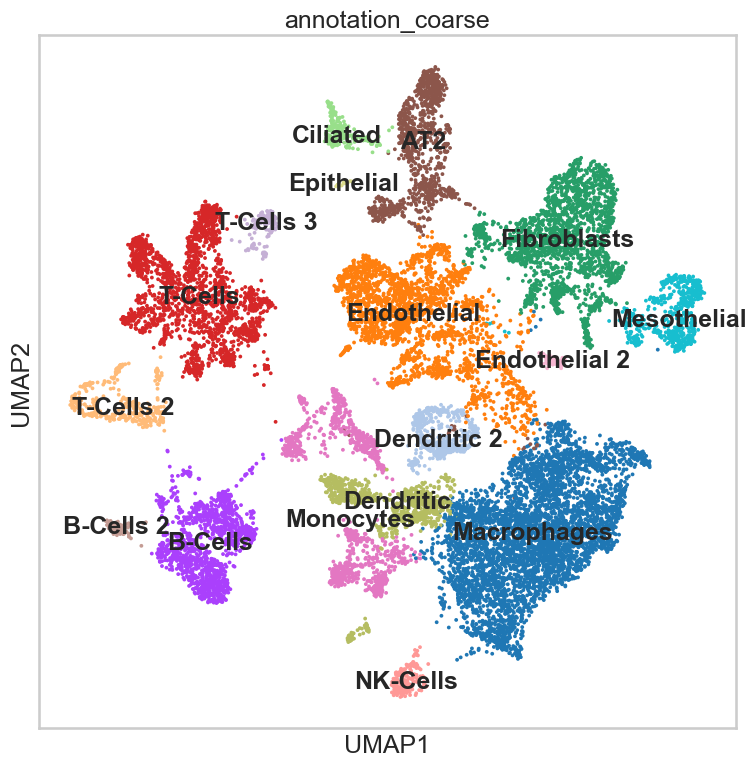

In [14]:
# Create a rough annotation of the cluster
# the annotation is based on the marker genes of the cell types (from Daniel) and on the research of the marker genes of the clusters
adata.obs['annotation_coarse'] = adata.obs.leiden.cat.rename_categories([
    'Macrophages', 'Endothelial', "Fibroblasts", 'T-Cells', 'B-Cells', 'AT2', 'Monocytes', 'Dendritic', 'Mesothelial', 'Dendritic 2', 'T-Cells 2', 'Ciliated', 'NK-Cells', 'T-Cells 3', 'B-Cells 2', 'Endothelial 2', 'Epithelial'])

sc.pl.umap(adata, color='annotation_coarse', size=30, legend_loc='on data')

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


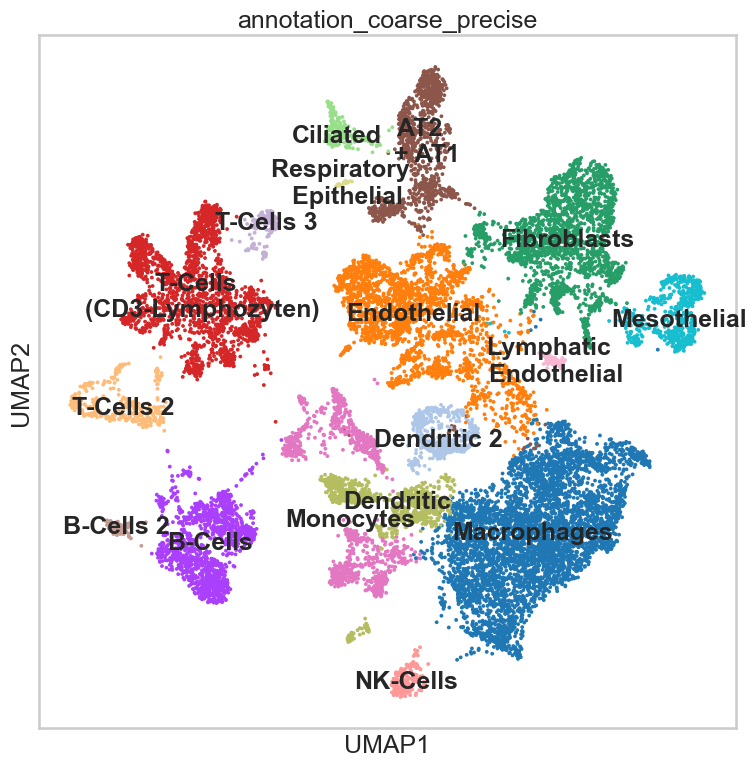

In [15]:
# add labels -> more precise
adata.obs['annotation_coarse_precise'] = adata.obs.leiden.cat.rename_categories([
    'Macrophages', 'Endothelial', "Fibroblasts", 'T-Cells \n (CD3-Lymphozyten)', 'B-Cells', 'AT2 \n + AT1', 'Monocytes', 'Dendritic', 'Mesothelial', 'Dendritic 2', 'T-Cells 2', 'Ciliated', 'NK-Cells', 'T-Cells 3', 'B-Cells 2', 'Lymphatic \n Endothelial', 'Respiratory \n Epithelial'])

sc.pl.umap(adata, color='annotation_coarse_precise', size=30, legend_loc='on data')

In [16]:
adata.write("data/adata_annotated_leiden_02.h5ad")

### More accurate annotation on more clusters


The annotation on the rough clustering with 'resolution=0.2' seems to be sufficient especially for the merging with other datasets in the future. However, in order to be able to analyze the data set alone even more precisely, a more precise annotation is made on more clusters -> 'resolution=0.3'. <br>
The annotation is again based on the marker genes of the cell types and on the marker genes of the clusters

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


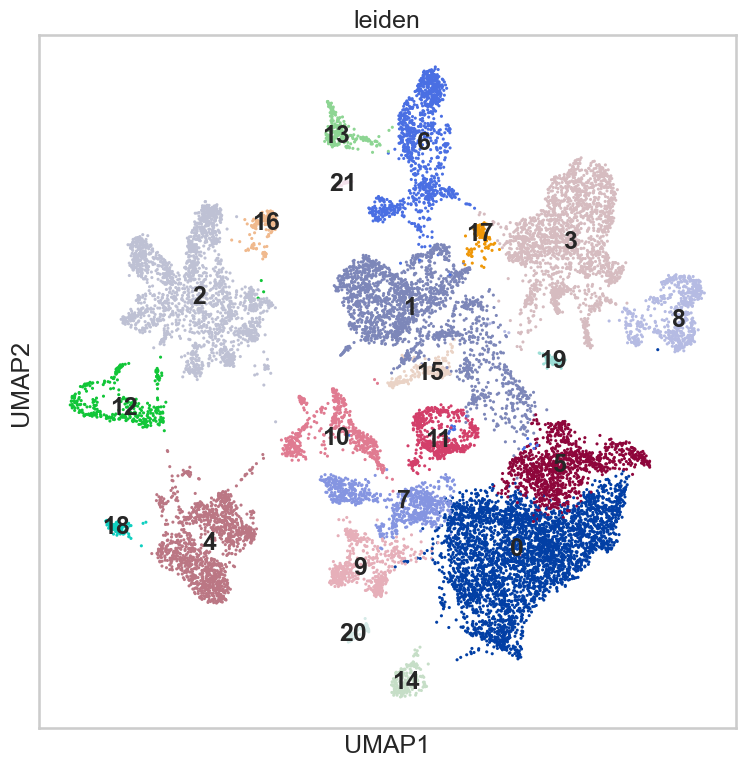

In [18]:
# load data
adata = sc.read("data/adata_processed_2_lea.h5ad")
sc.tl.leiden(adata, resolution=0.3)
sc.pl.umap(adata, color='leiden', size=20, legend_loc='on data')

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


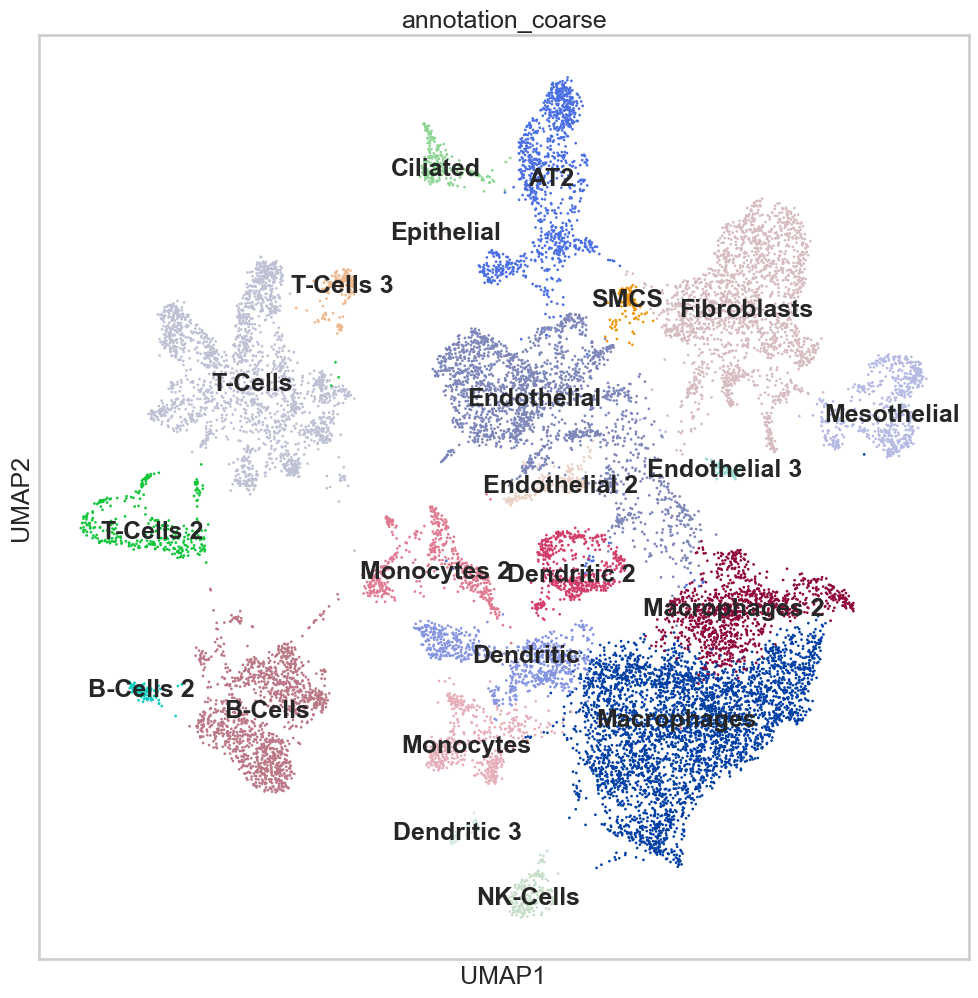

In [29]:
# add labels -> more precise
adata.obs['annotation_coarse'] = adata.obs.leiden.cat.rename_categories([
    'Macrophages', 'Endothelial', 'T-Cells', 'Fibroblasts', 'B-Cells', 'Macrophages 2', 'AT2', 'Dendritic', 'Mesothelial', 'Monocytes', 'Monocytes 2', 'Dendritic 2', 'T-Cells 2', 'Ciliated', 'NK-Cells', 'Endothelial 2', 'T-Cells 3', 'SMCS', 'B-Cells 2', 'Endothelial 3', 'Dendritic 3', 'Epithelial'])


sc.pl.umap(adata, color='annotation_coarse', size=15, legend_loc='on data')

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


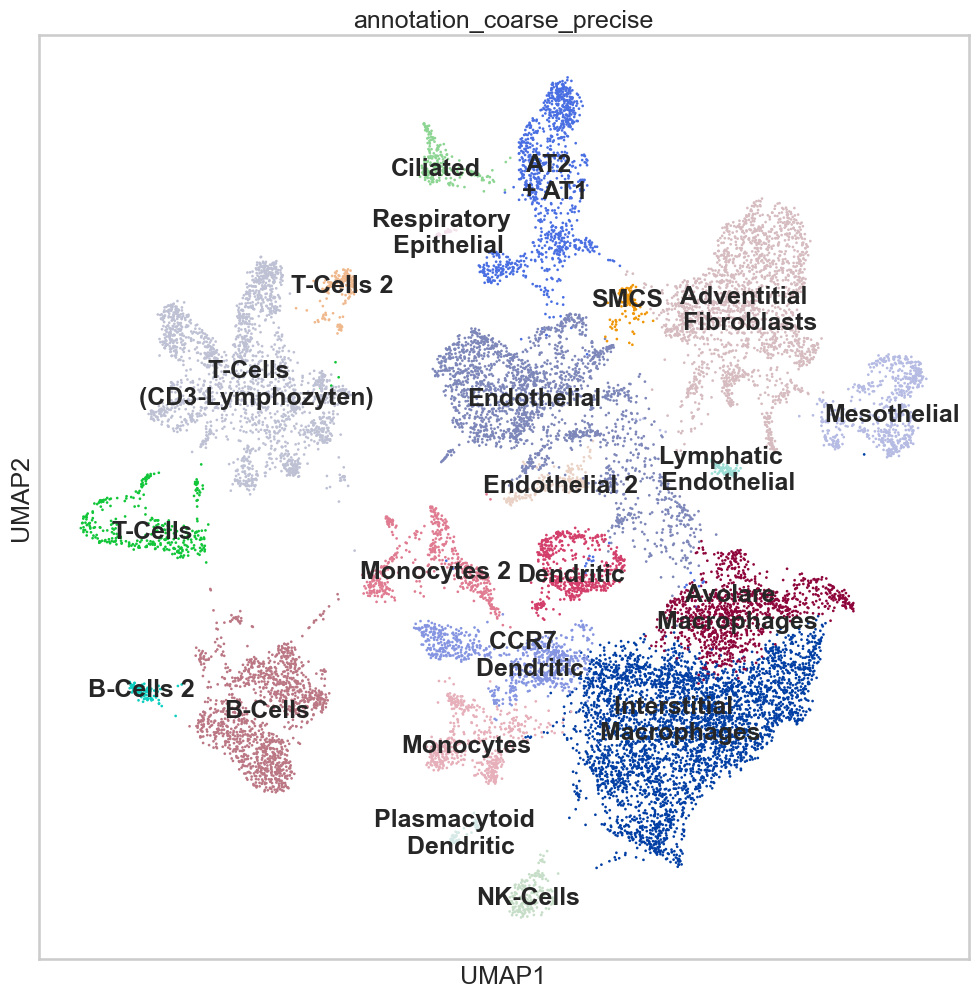

In [27]:
# add labels -> more precise
adata.obs['annotation_coarse_precise'] = adata.obs.leiden.cat.rename_categories([
    'Interstitial \n Macrophages', 'Endothelial', 'T-Cells \n (CD3-Lymphozyten)', 'Adventitial \n Fibroblasts', 'B-Cells', 'Avolare \n Macrophages', 'AT2 \n + AT1', 'CCR7 \n Dendritic', 'Mesothelial', 'Monocytes',
    'Monocytes 2', 'Dendritic', 'T-Cells', 'Ciliated', 'NK-Cells', 'Endothelial 2', 'T-Cells 2', 'SMCS',
    'B-Cells 2', 'Lymphatic \n Endothelial', 'Plasmacytoid \n Dendritic', 'Respiratory \n Epithelial'])


sc.pl.umap(adata, color='annotation_coarse_precise', size=15, legend_loc='on data')

In [30]:
adata.write("data/adata_annotated_leiden_03.h5ad")